In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import umap
import seaborn as sns

In [49]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_all_z = pd.read_csv(os.path.join(folder_path, "features_combined_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_all_mm = pd.read_csv(os.path.join(folder_path, "features_combined_all_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_all_mm_cl= df_combined_all_mm.drop(columns=['label', 'filename'])
df_combined_all_z_cl= df_combined_all_z.drop(columns=['label', 'filename'])

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

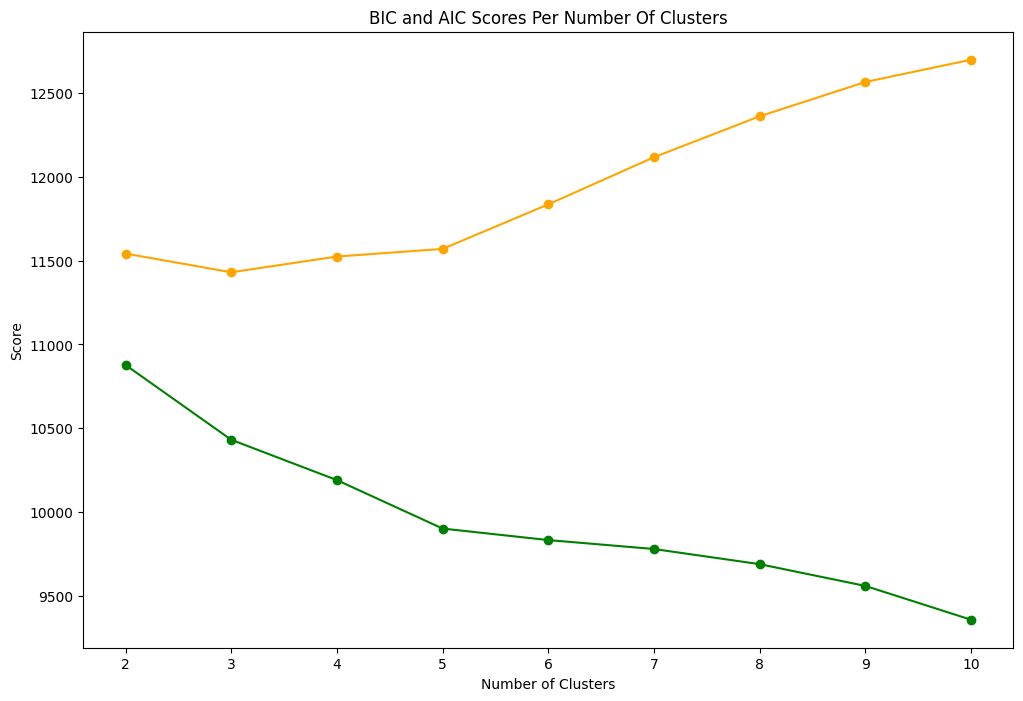

In [50]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_all_z_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_all_z_cl))
    aic_score.append(gm.aic(df_combined_all_z_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')


In [51]:
n_components = 3# Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_z.items():
    gmm_model.fit(df_combined_all_z_cl)

In [52]:
covariances_z = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_z.items()}

In [53]:
predictions_z = {cov_type: gmm_model.predict(df_combined_all_z_cl)
               for cov_type, gmm_model in gmm_models_z.items()}

Covariance Matrix (full - Component):
[[ 1.37197634 -0.28136174 -0.09235719  0.04800828 -0.19894136 -0.04425664
  -0.14806967 -0.15700784  0.11909206  0.00932201 -0.19860573]
 [-0.28136174  0.99329149  1.02583415 -0.22123858 -0.04478188 -0.68154295
  -0.27106439 -0.26237092 -0.5568974   0.16402366  0.45244421]
 [-0.09235719  1.02583415  1.58177445 -0.40450386  0.16191047 -0.55842185
  -0.39303284 -0.30495132 -0.70598709  0.25109723  0.55375868]
 [ 0.04800828 -0.22123858 -0.40450386  0.58934706 -0.30755256 -0.14555199
   0.30124828 -0.04148891  0.21706205 -0.25499607 -0.05576858]
 [-0.19894136 -0.04478188  0.16191047 -0.30755256  0.72922719  0.73673012
   0.25427654  0.45850297 -0.033031    0.10972308  0.16124792]
 [-0.04425664 -0.68154295 -0.55842185 -0.14555199  0.73673012  1.63956391
   0.32410354  0.56704452  0.63106371  0.12770456 -0.47770051]
 [-0.14806967 -0.27106439 -0.39303284  0.30124828  0.25427654  0.32410354
   0.83571099  0.68212599  0.08806037 -0.16858534  0.25867576]
 [-

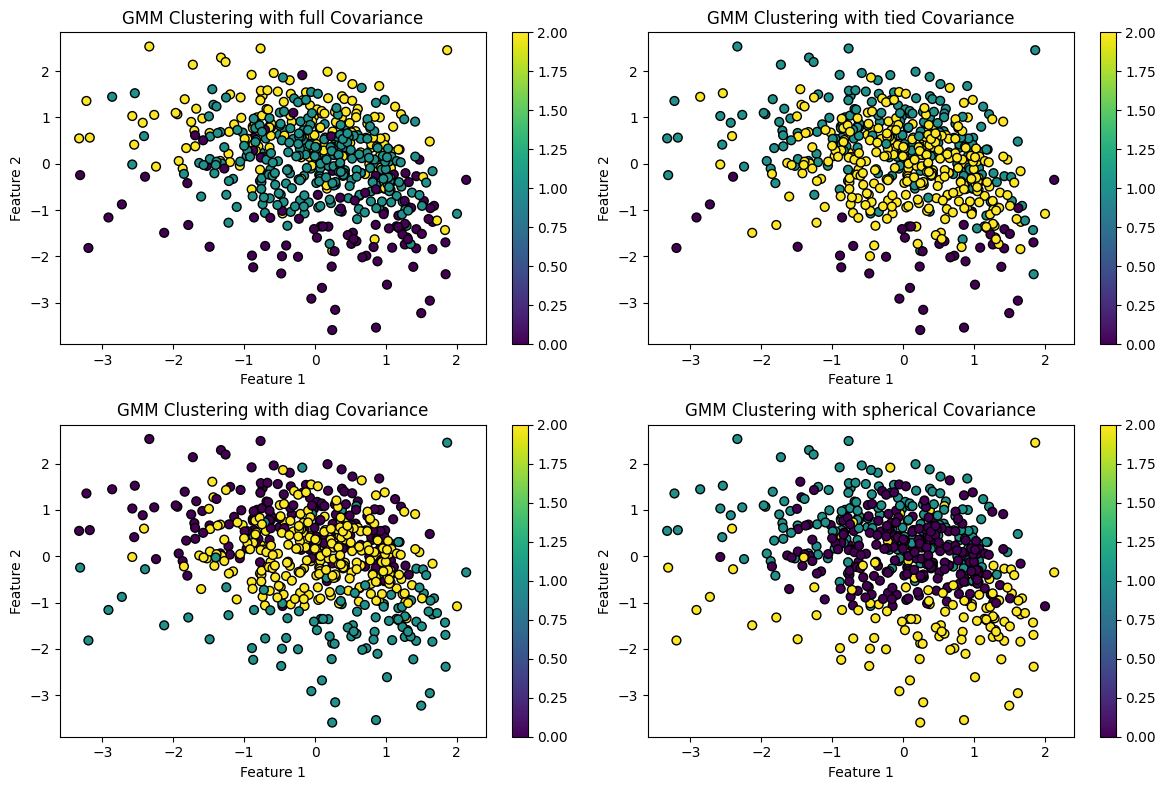

In [54]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_all_z_cl.iloc[:, 0], df_combined_all_z_cl.iloc[:, 1], c=predictions_z[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_z[cov_type][0]}')

plt.tight_layout()
plt.show()

In [55]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_all_z_cl, predictions_z[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.189
Tied covariance: Silhouette Score = 0.185
Diag covariance: Silhouette Score = 0.186
Spherical covariance: Silhouette Score = 0.176


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


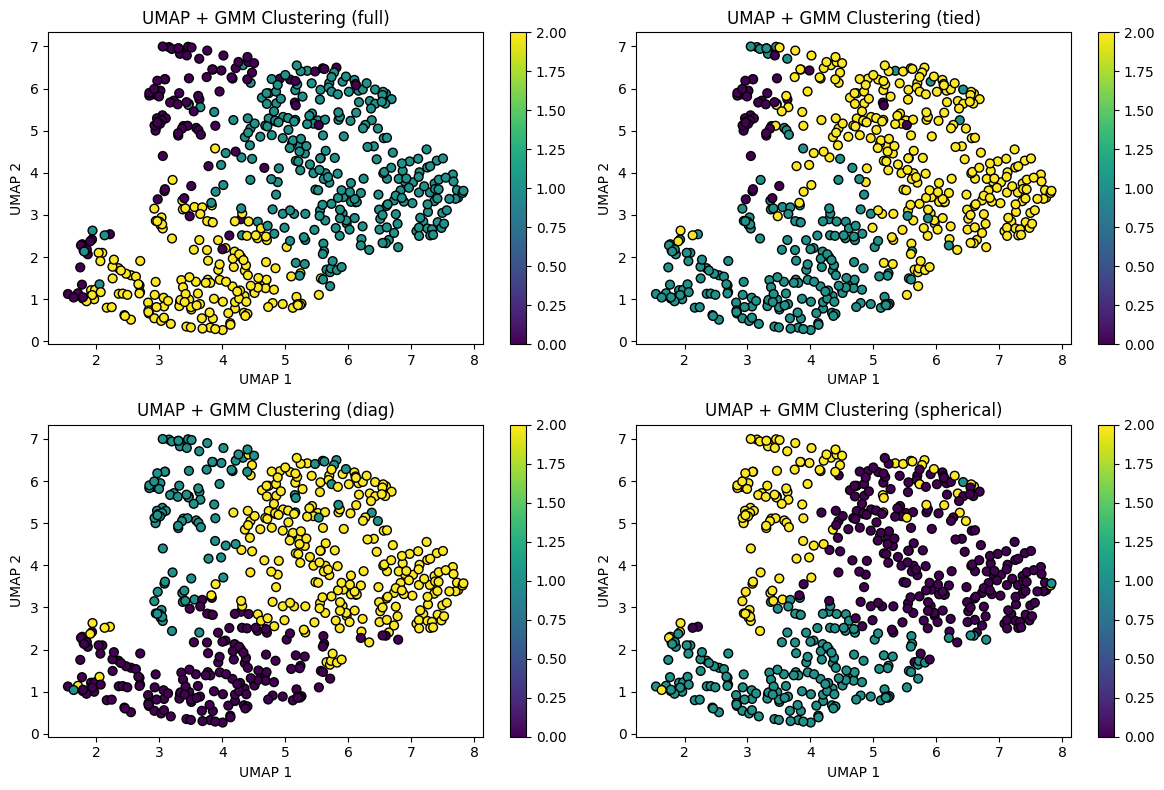

In [56]:
reducer = umap.UMAP(n_neighbors=30, n_components=2,random_state=42)
embedding = reducer.fit_transform(df_combined_all_z_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_z[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [57]:
df_combined_all_z_cl['predictions_z_full'] = predictions_z['full']
df_combined_all_z_cl['predictions_z_tied'] = predictions_z['tied']
df_combined_all_z_cl['predictions_z_diag'] = predictions_z['diag']
df_combined_all_z_cl['predictions_z_spherical'] = predictions_z['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_all_z['label'], df_combined_all_z_cl['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_all_z['label'], df_combined_all_z_cl['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_all_z['label'], df_combined_all_z_cl['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_all_z['label'], df_combined_all_z_cl['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])


# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)   0    1    2
Label                       
higher          43  224    1
smaller         62   47  160

Contingency Table for Tied Covariance:
Cluster (tied)   0    1    2
Label                       
higher          12   11  245
smaller         30  204   35

Contingency Table for Diagonal Covariance:
Cluster (diag)    0   1    2
Label                       
higher           11  48  209
smaller         164  62   43

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1   2
Label                            
higher               198   13  57
smaller               31  173  65


Siempre  hay un cluster con más cantidad de smaller y otro con mas cantidad de higher con tres clusteres, pero si uso 4 en algunos casos puedo ver la separacion entre los dos grupos de higher.
Con dos clusters con algunos tipos de linkage se queda muy lleno solo un cluster o hay reparto de smaller en un cluster y de higher en otro


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

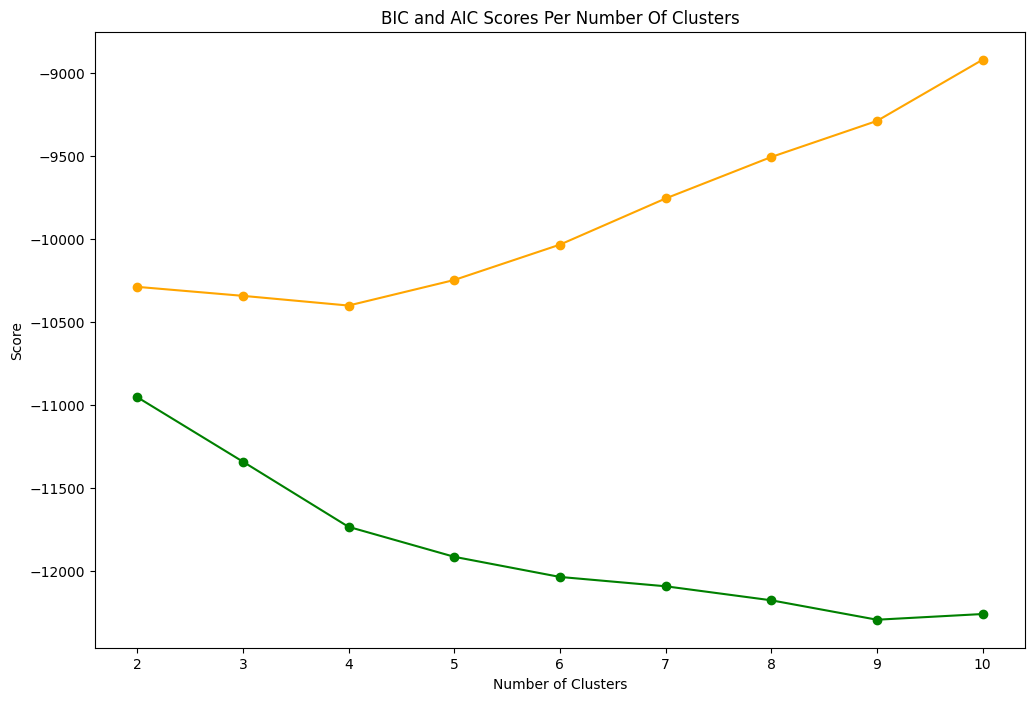

In [58]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_all_mm_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_all_mm_cl))
    aic_score.append(gm.aic(df_combined_all_mm_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [59]:
n_components = 3 # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(df_combined_all_mm_cl)

In [60]:
covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

predictions_mm = {cov_type: gmm_model.predict(df_combined_all_mm_cl)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component):
[[ 2.54273658e-02 -6.16637146e-03 -1.57612691e-03 -9.55618061e-04
   1.01210681e-03  2.76329182e-03  3.22086199e-04  2.23064124e-03
   4.41808637e-03  1.20097883e-03 -4.11348282e-03]
 [-6.16637146e-03  1.50076843e-02  9.02883433e-03  2.57529227e-05
  -1.38693539e-03 -5.63273431e-03 -4.32174432e-03 -8.06900794e-03
  -1.19297338e-02 -5.33571942e-03  1.03663508e-02]
 [-1.57612691e-03  9.02883433e-03  1.32986031e-02 -2.47506092e-03
   6.57782747e-04 -2.05281874e-03 -7.70264155e-03 -7.20538666e-03
  -6.72509292e-03 -4.30816516e-03  6.22318531e-03]
 [-9.55618061e-04  2.57529227e-05 -2.47506092e-03  8.41797703e-03
  -2.24766244e-03 -1.35754188e-03  8.35280311e-03 -6.97569068e-04
  -2.32876777e-03  2.06964329e-03  1.17222645e-03]
 [ 1.01210681e-03 -1.38693539e-03  6.57782747e-04 -2.24766244e-03
   4.28585586e-03  3.61840360e-03  1.35245015e-03  3.81494351e-03
   3.37670501e-05  4.70158005e-04 -3.71702250e-05]
 [ 2.76329182e-03 -5.63273431e-03 -2.05281874e-

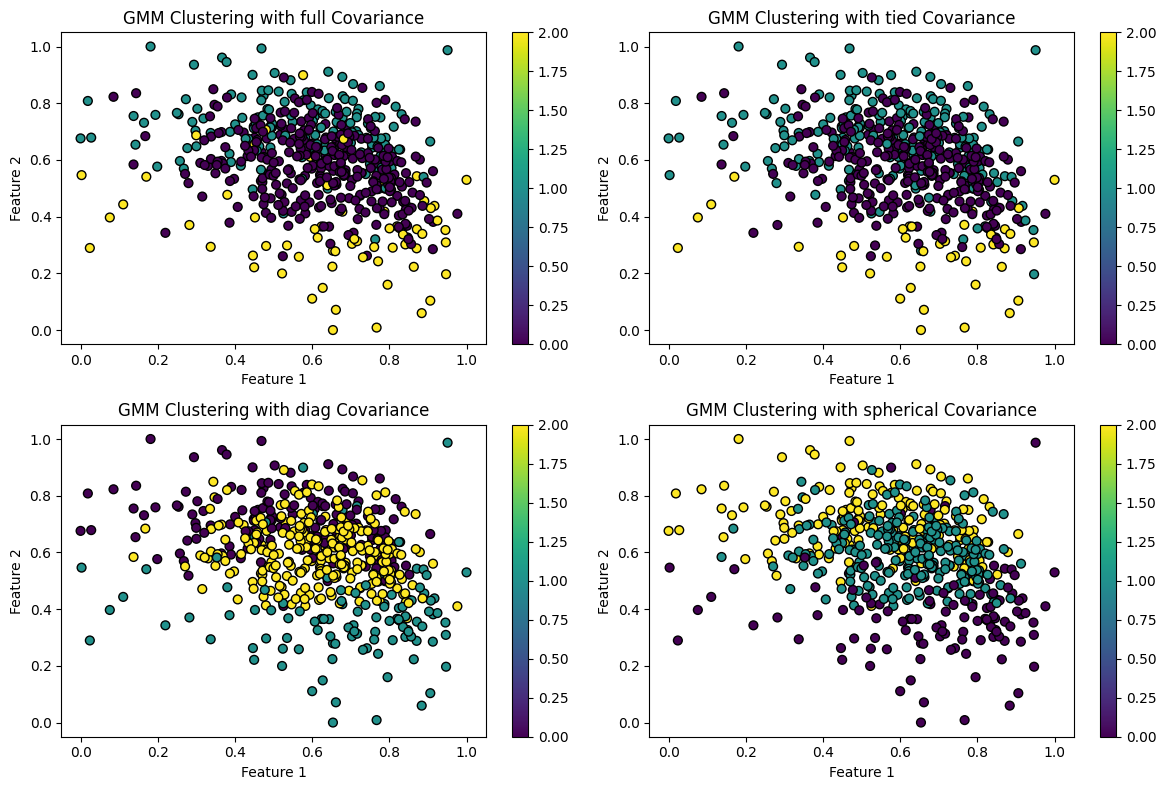

In [61]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_all_mm_cl.iloc[:, 0], df_combined_all_mm_cl.iloc[:, 1], c=predictions_mm[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


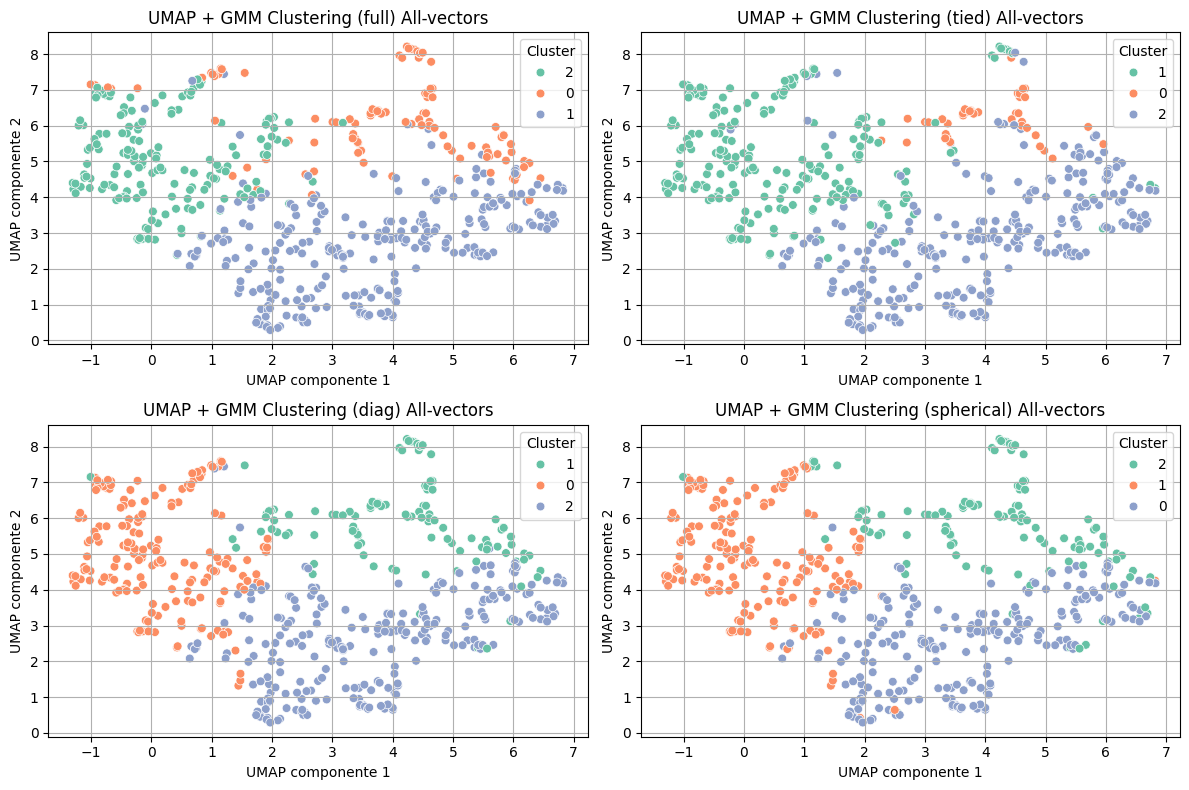

In [62]:
reducer = umap.UMAP(n_neighbors=10, n_components=2,random_state=42)
embedding = reducer.fit_transform(df_combined_all_mm_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    df_plot = pd.DataFrame({
        'UMAP 1': embedding[:, 0],
        'UMAP 2': embedding[:, 1],
        'Cluster': predictions_z[cov_type].astype(str)
    })

    plt.subplot(2, 2, i)
    sns.scatterplot(
        data=df_plot,
        x='UMAP 1',
        y='UMAP 2',
        hue='Cluster',
        palette='Set2',
        edgecolor='white',
        s=40,
        alpha=1,
        legend='full'
    )
    plt.title(f'UMAP + GMM Clustering ({cov_type}) All-vectors')
    plt.xlabel('UMAP componente 1')
    plt.ylabel('UMAP componente 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [63]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_all_mm_cl, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.200
Tied covariance: Silhouette Score = 0.203
Diag covariance: Silhouette Score = 0.204
Spherical covariance: Silhouette Score = 0.200


In [64]:
df_combined_all_mm_cl['predictions_z_full'] = predictions_mm['full']
df_combined_all_mm_cl['predictions_z_tied'] = predictions_mm['tied']
df_combined_all_mm_cl['predictions_z_diag'] = predictions_mm['diag']
df_combined_all_mm_cl['predictions_z_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])


# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0    1   2
Label                       
higher          252    1  15
smaller          65  152  52

Contingency Table for Tied Covariance:
Cluster (tied)    0    1   2
Label                       
higher          245   11  12
smaller          37  202  30

Contingency Table for Diagonal Covariance:
Cluster (diag)    0   1    2
Label                       
higher           11  48  209
smaller         166  62   41

Contingency Table for Spherical Covariance:
Cluster (spherical)   0    1    2
Label                            
higher               55  199   14
smaller              65   31  173


se reduce la dimensionalidad con umap

minmax